# seaborn 入门

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。掌握seaborn能很大程度帮助我们更高效的观察数据与图表，并且更加深入了解它们。

其有如下特点：

* 基于matplotlib aesthetics绘图风格，增加了一些绘图模式
* 增加调色板功能，利用色彩丰富的图像揭示您数据中的模式
* 运用数据子集绘制与比较单变量和双变量分布的功能
* 运用聚类算法可视化矩阵数据
* 灵活运用处理时间序列数据
* 利用网格建立复杂图像集

## 一. 绘制概率密度函数

### distplot()
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

#### Histograms直方图
直方图(Histogram)又称质量分布图。是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt #导入
import matplotlib
import seaborn as sns

#解决负号显示问题
matplotlib.rcParams['axes.unicode_minus']=False


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


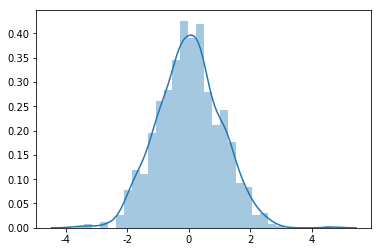

In [3]:
x = np.random.normal(0,1,1000)
sns.distplot(x) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


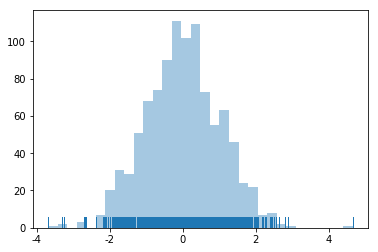

In [4]:
#kde=False关闭核密度分布,rug表示在x轴上每个观测上生成的小细条（边际毛毯）
sns.distplot(x, kde=False, rug=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


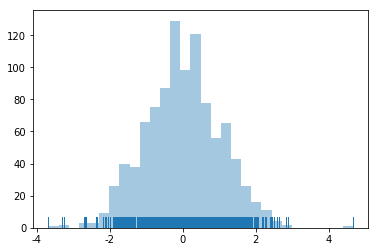

In [5]:
#density
sns.distplot(x,bins=30,kde=False,rug=True)

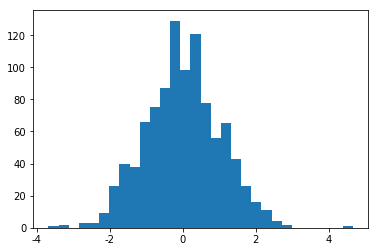

In [6]:
#对比Matplotlib
plt.figure()
plt.hist(x,bins=30)
plt.show()

### Kernel density estimaton核密度估计
核密度估计是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。．由于核密度估计方法不利用有关数据分布的先验知识，对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法，因而，在统计学理论和应用领域均受到高度的重视。

### kdeplot()
seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

Fit and plot a univariate or bivariate kernel density estimate.

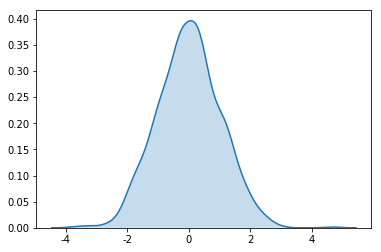

In [7]:
sns.kdeplot(x, shade=True);#shade控制阴影

##### Fitting parametric distributions拟合参数分布
可以利用distplot() 把数据拟合成参数分布的图形并且观察它们之间的差距,再运用fit来进行参数控制。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


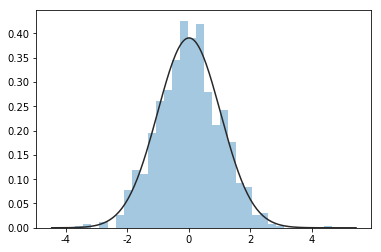

In [8]:
sns.distplot(x,kde=False,fit=stats.norm)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


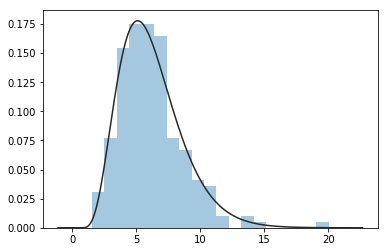

In [9]:
x = np.random.gamma(6, size=200)#生成gamma分布的数据
sns.distplot(x, kde=False, fit=stats.gamma);#fit拟合

Example Ⅰ for practice

In [10]:
x = np.random.normal(0,1,100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


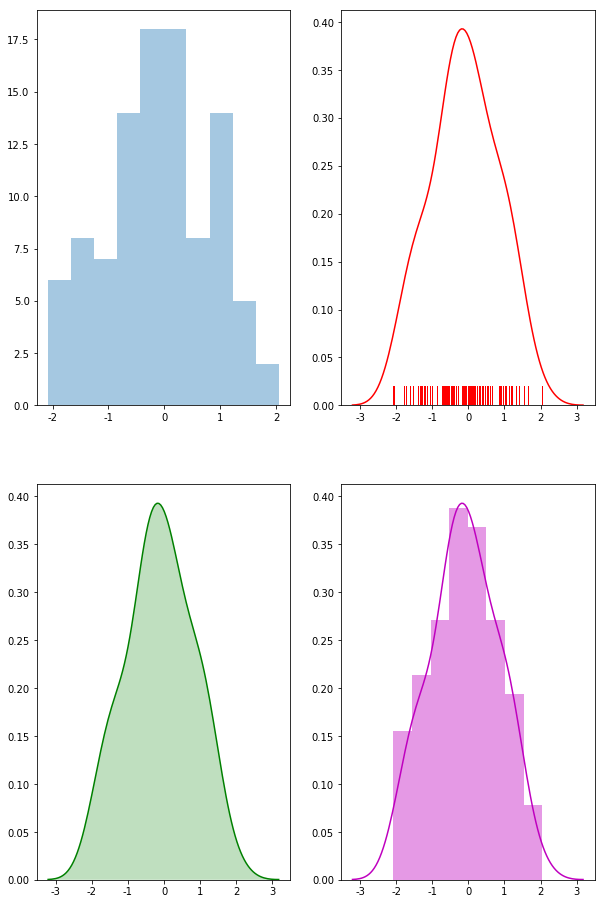

In [33]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,16))
sns.distplot(x,kde=False,bins=10,ax=axes[0][0])
sns.distplot(x,kde=True,ax=axes[0][1],color='r',hist=False,rug=True)
sns.kdeplot(x,shade=True,ax=axes[1][0],color='g')
sns.distplot(x,ax=axes[1][1],color='m')


## 二. barplot条形图

seaborn的barplot()利用矩阵条的高度反映数值变量的集中趋势，以及使用errorbar(误差棒)功能来估计变量之间的差值统计。请谨记barplot展示的是某种变量分布的**平均值**，当需要精确观察每类变量的分布趋势，boxplot与violinplot往往是更好的选择。

误差棒是以被测量的算术平均值为中点，在表示测量值大小的方向上画出的一个线段，线段长度的一半等于（标准或扩展）不确定度。它表示被测量以某一概率（68%或95%）落在棒上。

具体用法如下：

seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, ax=None, estimator=<function mean>，**kwargs)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt #导入

In [5]:
sns.set_style('whitegrid')
tips = sns.load_dataset('tips') #载入自带的数据集

In [9]:
tips.shape

(244, 7)

In [13]:
tips.loc[110:120]

,total_bill,tip,sex,smoker,day,time,size
110,14.00,3.00,Male,No,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
112,38.07,4.00,Male,No,Sun,Dinner,3
113,23.95,2.55,Male,No,Sun,Dinner,2
114,25.71,4.00,Female,No,Sun,Dinner,3
115,17.31,3.50,Female,No,Sun,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4
117,10.65,1.50,Female,No,Thur,Lunch,2
118,12.43,1.80,Female,No,Thur,Lunch,2
119,24.08,2.92,Female,No,Thur,Lunch,4


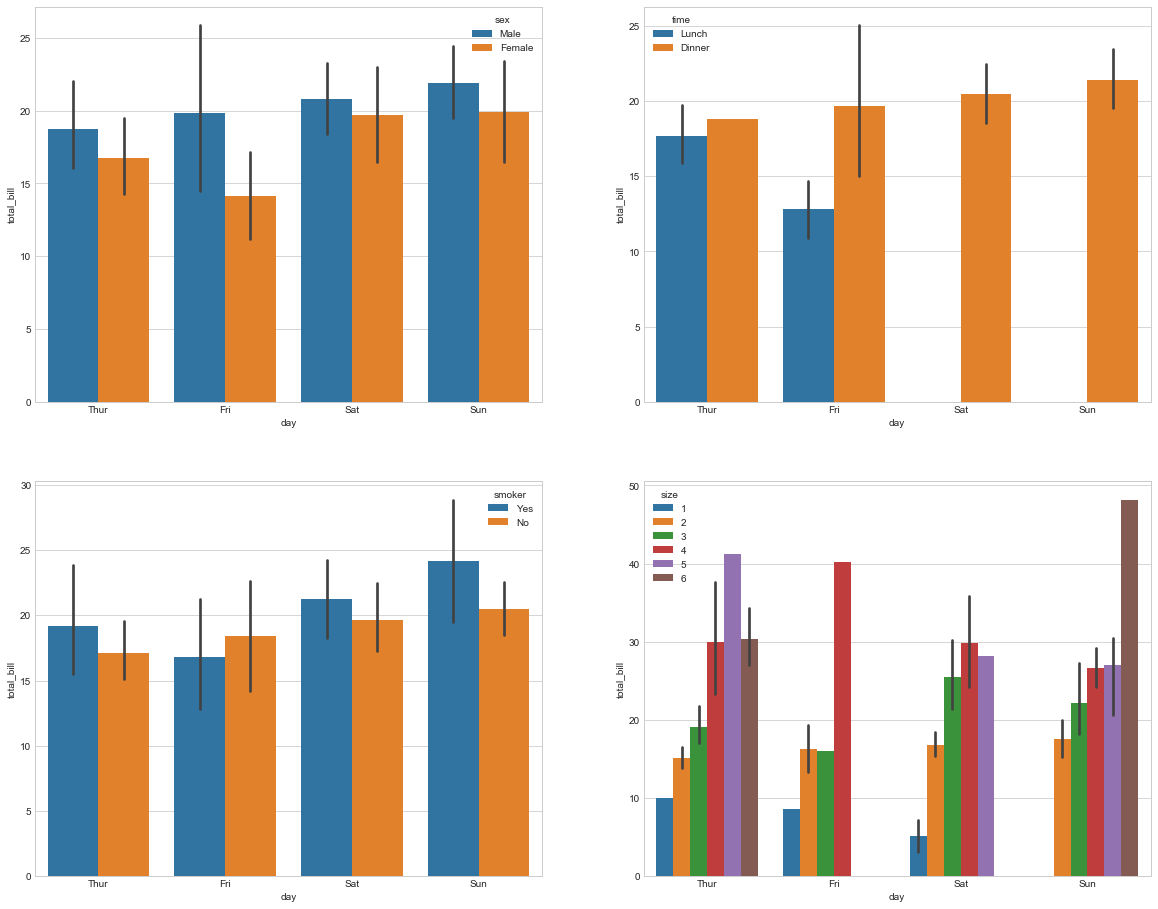

In [23]:
#x轴为分类变量day,y轴为数值变量total_bill，利用颜色再对sex,time,smoker,size分类
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,16))
ax1 = sns.barplot(x='day',y='total_bill',hue='sex',data=tips,ax=axes[0][0])
ax2 = sns.barplot(x='day',y='total_bill',hue='time',data=tips,ax=axes[0][1])
ax3 = sns.barplot(x='day',y='total_bill',hue='smoker',data=tips,ax=axes[1][0])
ax3 = sns.barplot(x='day',y='total_bill',hue='size',data=tips,ax=axes[1][1])